In [5]:
!pip install kagglehub


First few rows of the dataset:
   PatientID  Age Gender  BMI     SurgeryType SurgeryDuration AnesthesiaType  \
0          1   33      M   32    Neurological         217 min          Local   
1          2   33      M   23  Cardiovascular         181 min          Local   
2          3   58      F   24      Orthopedic          79 min        General   
3          4   65      F   26      Orthopedic         210 min          Local   
4          5   65      M   28    Neurological         221 min        General   

        PreoperativeNotes              PostoperativeNotes  PainLevel  \
0  Hypertension, diabetes  Minimal pain, no complications          7   
1    Stable, no allergies  Minimal pain, no complications          7   
2    Stable, no allergies  Minimal pain, no complications          3   
3    Stable, no allergies             Pain, slow recovery          7   
4    Stable, no allergies             Pain, slow recovery          5   

           Complications  Outcome  
0                 

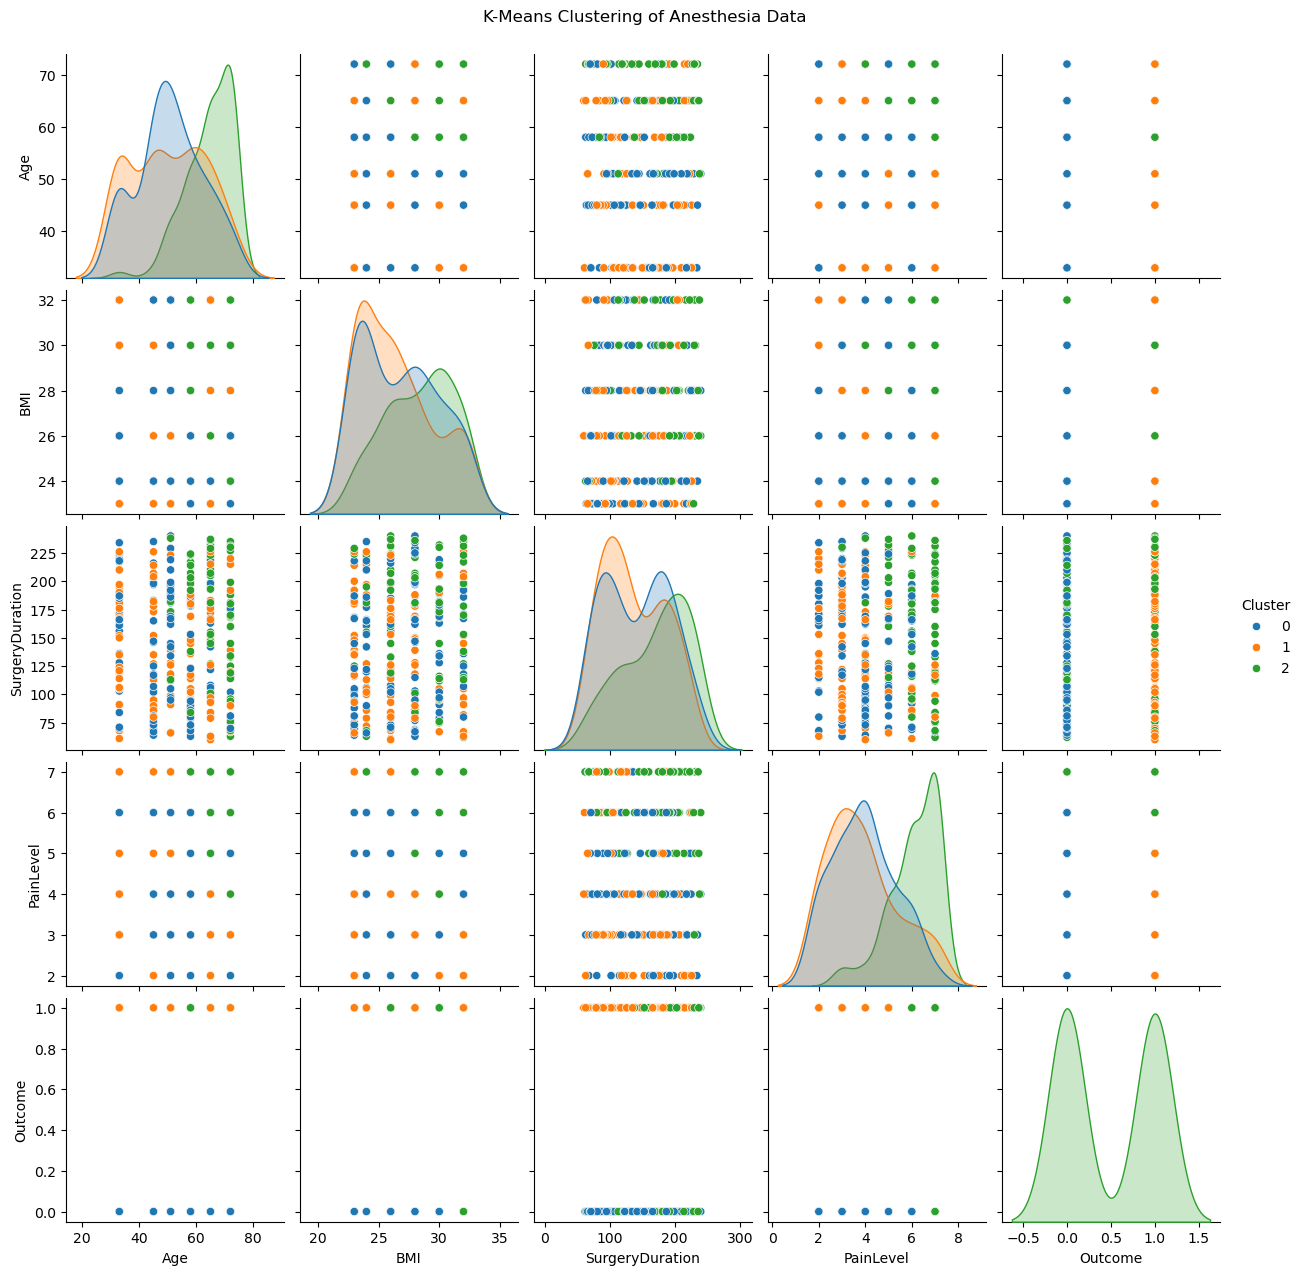


Cluster centers (standardized):
[[-0.2697149  -0.09266803 -0.10307484 -0.33555518 -1.        ]
 [-0.31849548 -0.20980571 -0.21812238 -0.37948403  1.        ]
 [ 0.7954744   0.40962276  0.43492123  0.96689824 -0.01234568]]

Cluster sizes:
Cluster
1    110
0    109
2     81
Name: count, dtype: int64

Feature averages per cluster:
               Age        BMI  SurgeryDuration  PainLevel   Outcome
Cluster                                                            
0        50.788991  26.770642       142.394495   3.944954  0.000000
1        50.163636  26.409091       136.472727   3.872727  1.000000
2        64.444444  28.320988       170.086420   6.086420  0.493827


In [4]:
import kagglehub
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Download dataset to a specific directory
# target_directory = "./my_target_dir"
# path = kagglehub.dataset_download(
#     "s3programmerlead/personalized-anesthesia-management-dataset",
#     download_dir=target_directory
# )
# print("Path to dataset files:", path)

# # 2. List the files to find the dataset CSV
# print("\nFiles in the dataset directory:")
# for f in os.listdir(path):
#     print(f)

# # 3. Load the data (update filename if necessary)
# csv_file = os.path.join(path, 'Personalized_Anesthesia_Management.csv')
df = pd.read_csv("Anesthesia_Dataset.csv")
print("\nFirst few rows of the dataset:")
print(df.head())

# Convert 'SurgeryDuration' from '217 min' to integer (minutes)
df['SurgeryDuration'] = df['SurgeryDuration'].str.replace(' min', '').astype(int)

# Select only numerical features for clustering
features = ['Age', 'BMI', 'SurgeryDuration', 'PainLevel', 'Outcome']
df_selected = df[features].dropna()

# Preprocess (scale) the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df_selected['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df_selected, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('K-Means Clustering of Anesthesia Data', y=1.02)
plt.show()

# Analyze clusters
print("\nCluster centers (standardized):")
print(kmeans.cluster_centers_)

print("\nCluster sizes:")
print(df_selected['Cluster'].value_counts())

print("\nFeature averages per cluster:")
print(df_selected.groupby('Cluster').mean())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


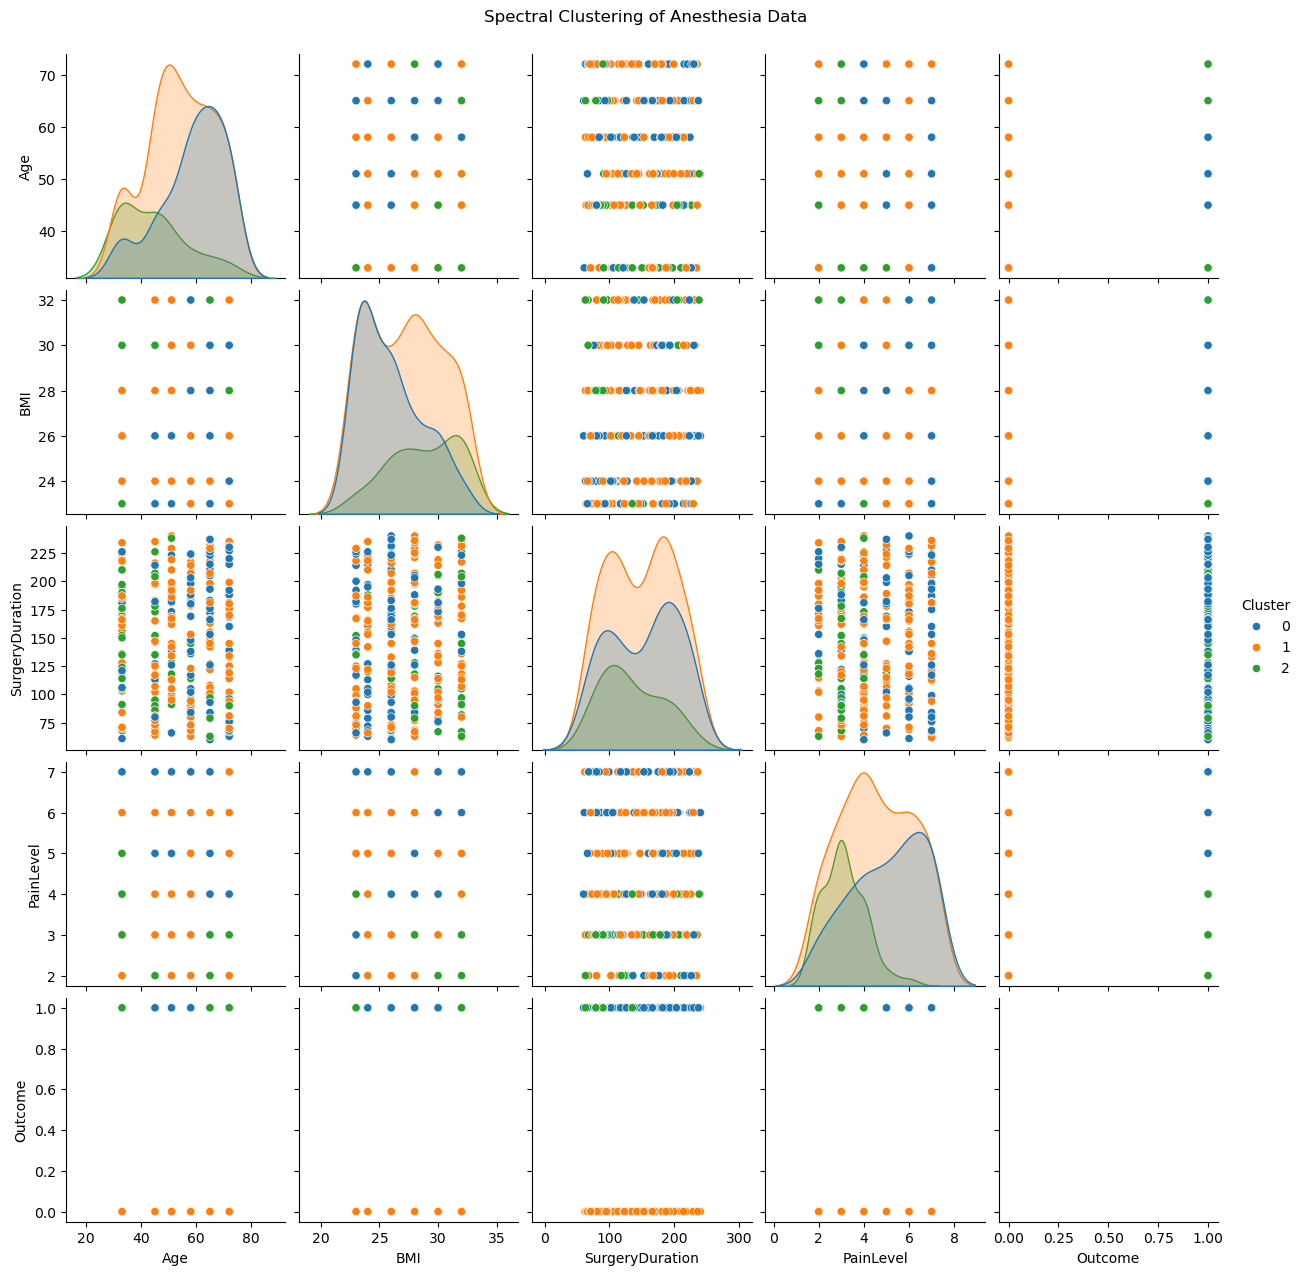


Cluster sizes:
Cluster
1    150
0    101
2     49
Name: count, dtype: int64

Feature averages per cluster:
               Age        BMI  SurgeryDuration  PainLevel  Outcome
Cluster                                                           
0        58.851485  25.960396       152.475248   5.069307      1.0
1        54.280000  27.240000       148.600000   4.560000      0.0
2        44.653061  28.755102       135.102041   3.122449      1.0


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering

# Load and clean data
df = pd.read_csv("Anesthesia_Dataset.csv")
df['SurgeryDuration'] = df['SurgeryDuration'].str.replace(' min', '').astype(int)
features = ['Age', 'BMI', 'SurgeryDuration', 'PainLevel', 'Outcome']
df_selected = df[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# Spectral Clustering
n_clusters = 3
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
df_selected['Cluster'] = spectral.fit_predict(X_scaled)

# Visualize clusters
sns.pairplot(df_selected, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Spectral Clustering of Anesthesia Data', y=1.02)
plt.show()

# Analyze clusters
print("\nCluster sizes:")
print(df_selected['Cluster'].value_counts())

print("\nFeature averages per cluster:")
print(df_selected.groupby('Cluster').mean())

In [ ]:
# Difference between K-means and SpectralClustering on same dataset:


1. K-means: Clusters are almost equal in size. 

VS 

Spectral Clustering finds a more imbalanced grouping, 
perhaps reflecting underlying data structure better.

2. K-means might be grouping based on outcome variable, not so much on patient/surgery features.
    VS
Spectral Clustering appears to find clusters with more meaningful differences in age, BMI, 
    and surgery characteristics that may be clinically relevant.







/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


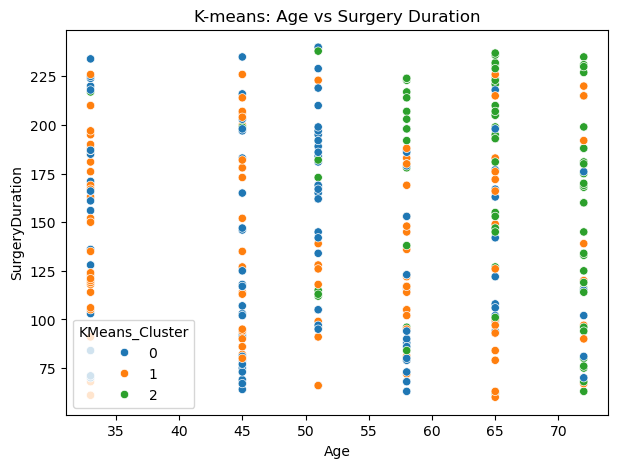

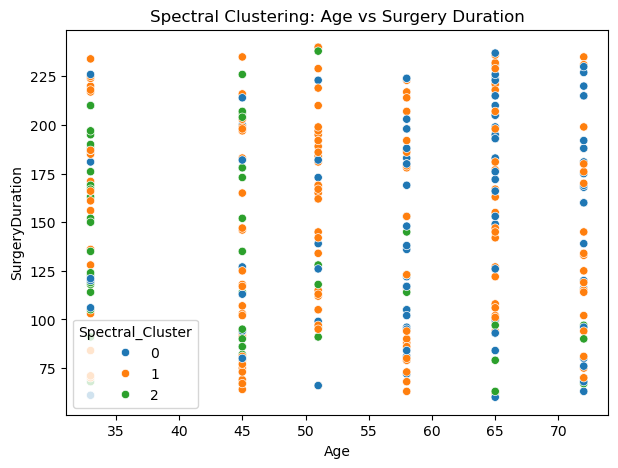

K-means Silhouette Score: 0.180
Spectral Clustering Silhouette Score: 0.180


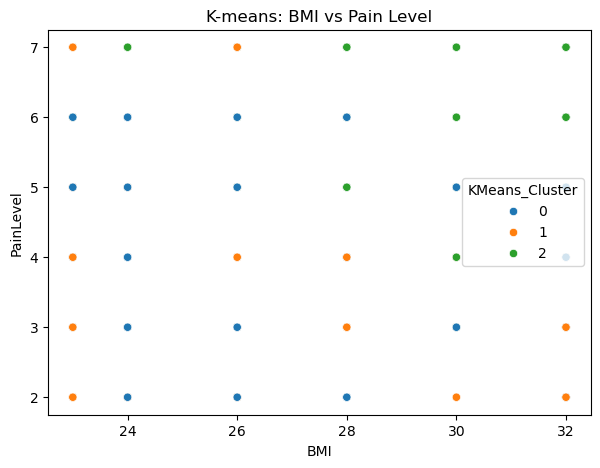

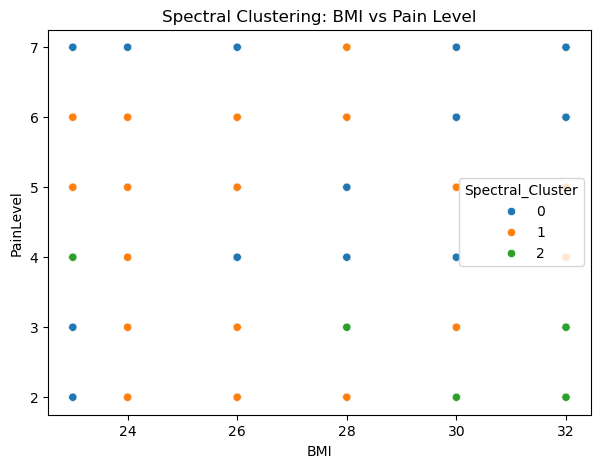

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load and preprocess data
df = pd.read_csv("Anesthesia_Dataset.csv")
df['SurgeryDuration'] = df['SurgeryDuration'].str.replace(' min', '').astype(int)
features = ['Age', 'BMI', 'SurgeryDuration', 'PainLevel', 'Outcome']
df_selected = df[features].dropna()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_selected)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_selected['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Spectral clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
df_selected['Spectral_Cluster'] = spectral.fit_predict(X_scaled)

# Visualization: Age vs Surgery Duration
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_selected, x='Age', y='SurgeryDuration', hue='KMeans_Cluster', palette='tab10')
plt.title("K-means: Age vs Surgery Duration")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_selected, x='Age', y='SurgeryDuration', hue='Spectral_Cluster', palette='tab10')
plt.title("Spectral Clustering: Age vs Surgery Duration")
plt.show()

# Quantitative comparison: Silhouette scores
score_kmeans = silhouette_score(X_scaled, df_selected['KMeans_Cluster'])
score_spectral = silhouette_score(X_scaled, df_selected['Spectral_Cluster'])

print(f"K-means Silhouette Score: {score_kmeans:.3f}")
print(f"Spectral Clustering Silhouette Score: {score_spectral:.3f}")

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_selected, x='BMI', y='PainLevel', hue='KMeans_Cluster', palette='tab10')
plt.title("K-means: BMI vs Pain Level")
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_selected, x='BMI', y='PainLevel', hue='Spectral_Cluster', palette='tab10')
plt.title("Spectral Clustering: BMI vs Pain Level")
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


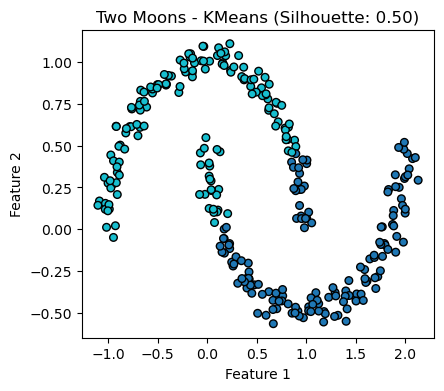

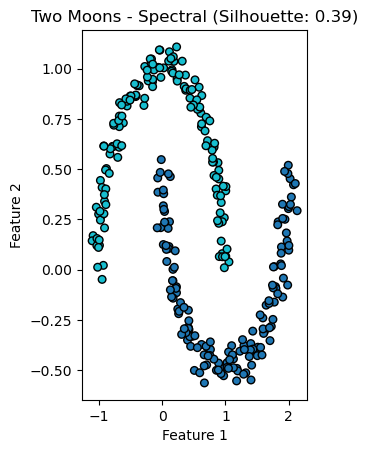

Two Moons Dataset:
KMeans Silhouette Score: 0.495
Spectral Clustering Silhouette Score: 0.386
--------------------------------------------------


/opt/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


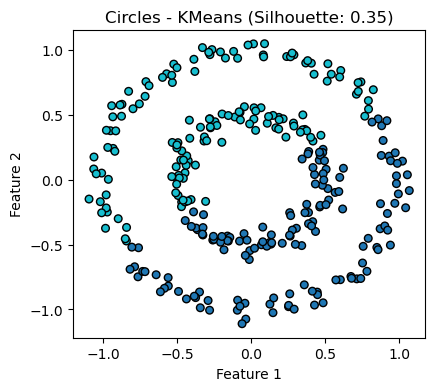

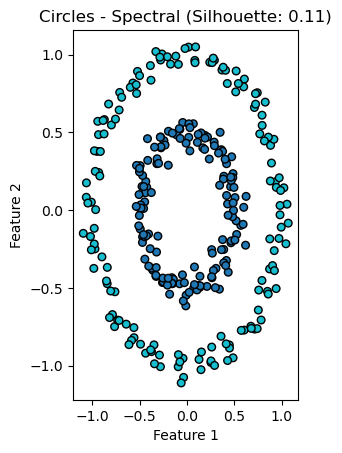

Circles Dataset:
KMeans Silhouette Score: 0.353
Spectral Clustering Silhouette Score: 0.110
--------------------------------------------------


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=30, edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def cluster_and_show(X, name):
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # KMeans clustering
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(X_scaled)
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)

    # Spectral clustering
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
    spectral_labels = spectral.fit_predict(X_scaled)
    spectral_silhouette = silhouette_score(X_scaled, spectral_labels)

    # Visualization
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plot_clusters(X, kmeans_labels, f"{name} - KMeans (Silhouette: {kmeans_silhouette:.2f})")

    plt.subplot(1, 2, 2)
    plot_clusters(X, spectral_labels, f"{name} - Spectral (Silhouette: {spectral_silhouette:.2f})")

    print(f"{name} Dataset:")
    print(f"KMeans Silhouette Score: {kmeans_silhouette:.3f}")
    print(f"Spectral Clustering Silhouette Score: {spectral_silhouette:.3f}")
    print('-'*50)

# 1. Two Moons
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
cluster_and_show(X_moons, "Two Moons")

# 2. Circles
X_circles, y_circles = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)
cluster_and_show(X_circles, "Circles")

In [ ]:
# Findings: Always visualize clusters—never rely only on silhouette score for non-convex data.